In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

print('Pandas version:', pd.__version__) # 2.2.3
print('Numpy version:', np.__version__) # 1.26.4
print('Seaborn version:', sns.__version__) # 0.13.2

Pandas version: 2.2.3
Numpy version: 1.26.4
Seaborn version: 0.13.2


# Load the dataset

In [3]:
df = pd.read_csv('../data/ConsumptionData/cleaned_consumption_data.csv')
df.head()

,Date,Bruto productie (mln kWh),Distributieverliezen (mln kWh),Eigen verbruik bij elektr.productie (mln kWh),Invoer|België (mln kWh),Invoer|Denemarken (mln kWh),Invoer|Duitsland (mln kWh),"Invoer|Invoer, totaal (mln kWh)",Invoer|Noorwegen (mln kWh),Invoer|Verenigd Koninkrijk (mln kWh),Netto productie|Brandstoffen|Aardgas (mln kWh),Netto productie|Brandstoffen|Biomassa (mln kWh),"Netto productie|Brandstoffen|Brandstoffen, totaal (mln kWh)",Netto productie|Brandstoffen|Kolen (mln kWh),Netto productie|Brandstoffen|Olieproducten (mln kWh),Netto productie|Brandstoffen|Overige brandstoffen (niet-hernieuwbaar) (mln kWh),Netto productie|Kernenergie (mln kWh),"Netto productie|Netto productie, totaal (mln kWh)",Netto productie|Overige bronnen (mln kWh),Netto productie|Waterkracht (mln kWh),Netto productie|Windenergie|Windenergie op land (mln kWh),Netto productie|Windenergie|Windenergie op zee (mln kWh),"Netto productie|Windenergie|Windenergie, totaal (mln kWh)",Netto productie|Zonnestroom (mln kWh),Netto verbruik (berekend) (mln kWh),Uitvoer|België (mln kWh),Uitvoer|Denemarken (mln kWh),Uitvoer|Duitsland (mln kWh),Uitvoer|Noorwegen (mln kWh),"Uitvoer|Uitvoer, totaal (mln kWh)",Uitvoer|Verenigd Koninkrijk (mln kWh)
0,2021-01-01,11647.0,447.0,345.0,184.0,153.0,1075.0,1542.0,130.0,0.0,6113.0,936.0,8897.0,1596.0,110.0,142.0,358.0,11303.0,34.0,7.0,943.0,868.0,1811.0,196.0,10731.0,1146.0,97.0,368.0,56.0,1667.0,0.0
1,2021-02-01,10907.0,401.0,296.0,460.0,180.0,730.0,1378.0,0.0,7.0,5882.0,819.0,7948.0,1037.0,102.0,109.0,321.0,10610.0,38.0,4.0,942.0,913.0,1854.0,444.0,9611.0,600.0,152.0,845.0,0.0,1977.0,380.0
2,2021-03-01,11626.0,412.0,322.0,393.0,242.0,605.0,1269.0,30.0,0.0,6091.0,875.0,8412.0,1212.0,99.0,135.0,360.0,11303.0,42.0,12.0,911.0,731.0,1642.0,835.0,9961.0,595.0,104.0,1296.0,0.0,2199.0,204.0
3,2021-04-01,9784.0,378.0,288.0,253.0,279.0,473.0,1384.0,380.0,0.0,4557.0,789.0,6410.0,799.0,130.0,135.0,333.0,9496.0,42.0,8.0,743.0,628.0,1371.0,1332.0,8791.0,666.0,73.0,924.0,47.0,1711.0,0.0
4,2021-05-01,9241.0,379.0,274.0,833.0,252.0,414.0,1868.0,370.0,0.0,4234.0,725.0,5918.0,714.0,104.0,142.0,210.0,8967.0,41.0,9.0,786.0,519.0,1305.0,1484.0,8963.0,435.0,73.0,913.0,71.0,1492.0,0.0


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 31 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Date                                                                             36 non-null     object 
 1   Bruto productie (mln kWh)                                                        36 non-null     float64
 2   Distributieverliezen (mln kWh)                                                   36 non-null     float64
 3   Eigen verbruik bij elektr.productie (mln kWh)                                    36 non-null     float64
 4   Invoer|België (mln kWh)                                                          36 non-null     float64
 5   Invoer|Denemarken (mln kWh)                                                      36 non-null     float64
 6   Invoer|Duits

We can see there are no null values in the dataset. The column we are mostly interested in is the `Netto Verbruik (berekend) (mln kWh)`. We can also see the date is stored as an object, this means we first need to convert this to a datetime type.

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes

Date                                                                               datetime64[ns]
Bruto productie (mln kWh)                                                                 float64
Distributieverliezen (mln kWh)                                                            float64
Eigen verbruik bij elektr.productie (mln kWh)                                             float64
Invoer|België (mln kWh)                                                                   float64
Invoer|Denemarken (mln kWh)                                                               float64
Invoer|Duitsland (mln kWh)                                                                float64
Invoer|Invoer, totaal (mln kWh)                                                           float64
Invoer|Noorwegen (mln kWh)                                                                float64
Invoer|Verenigd Koninkrijk (mln kWh)                                                      float64
Netto productie|Bran

In [9]:
df_consumption = df.copy()
df_consumption = df_consumption[['Date', 'Netto verbruik (berekend) (mln kWh)']]
df_consumption = df_consumption.rename(columns={'Netto verbruik (berekend) (mln kWh)': 'Consumption'})
df_consumption['Year'] = df_consumption['Date'].dt.year
df_consumption['Month'] = df_consumption['Date'].dt.month

# rearrange col names
df_consumption = df_consumption[['Year', 'Month'] + [col for col in df_consumption.columns if col not in ['Year', 'Month']]] 

df_consumption.sample(5)

,Year,Month,Date,Consumption
30,2023,7,2023-07-01,8808.0
22,2022,11,2022-11-01,8841.0
9,2021,10,2021-10-01,9401.0
14,2022,3,2022-03-01,9159.0
32,2023,9,2023-09-01,8648.0


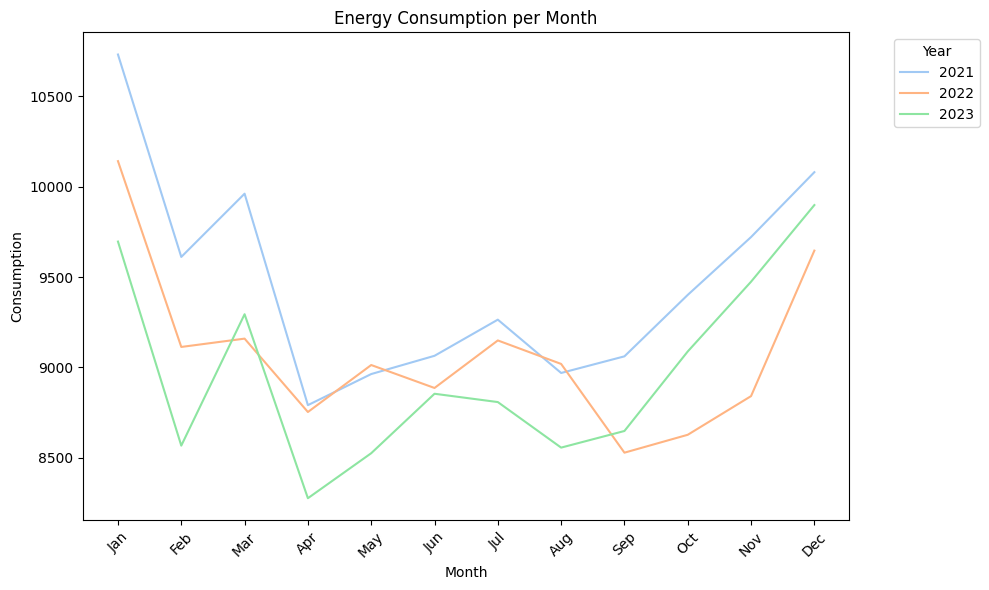

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_consumption['Month'], y=df_consumption['Consumption'], hue=df_consumption['Year'], palette='pastel')

plt.title('Energy Consumption per Month')
plt.xticks(df_consumption['Date'].dt.month.unique(), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

By looking at this graph we can see the consumption for 2021 has been higher than 2022 and 2023. Especially in the winter months the consumption is higher, this is most likely due to the colder weather and people consuming more energy for heating. We have to correlate this to the weather data to see if that explains why the consumption might have been higher in 2021. 

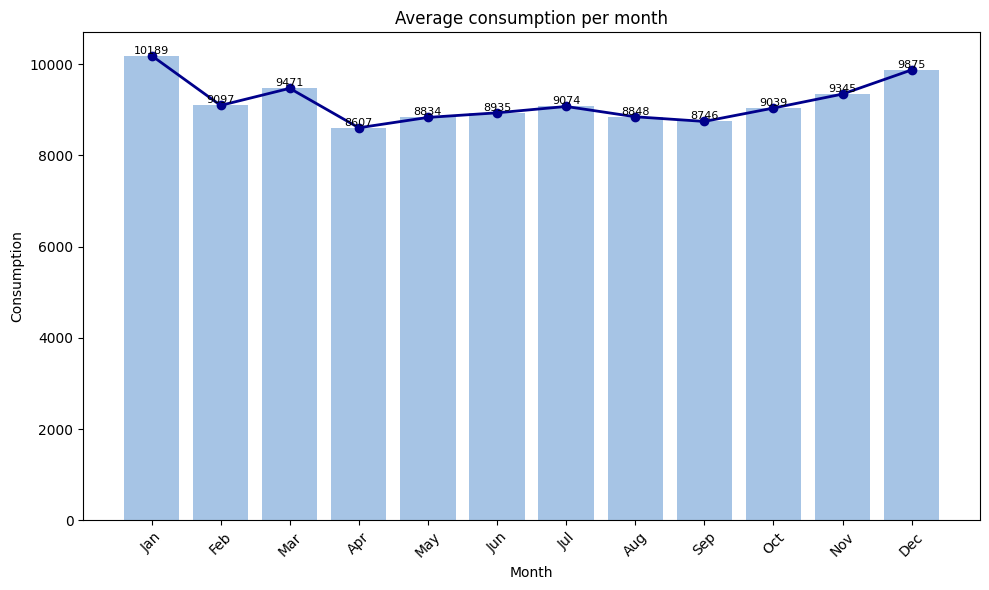

In [11]:
monthly_avg = df_consumption.groupby('Month')['Consumption'].mean()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color='#9cc4ef')

for bar, value in zip(barplot.patches, monthly_avg):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()

    plt.text(
        x=bar_x, 
        y=bar_height, 
        s=f"{value:.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=8, 
        color='black'
    )

plt.plot(
    monthly_avg.index - 1, 
    monthly_avg.values, 
    marker='o', 
    color='darkblue', 
    linewidth=2, 
    label='Trend'
)

plt.xticks(ticks=monthly_avg.index - 1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.title('Average consumption per month')
plt.ylabel('Consumption')

plt.tight_layout()
plt.show()

By looking at this graph that takes the average energy consumption per month for all 3 years we can see there is only a slight difference between the months in the summer and winter.

## Weather Data
Next we will look if there is any correlation between the monhtly energy consumption and the temperatures. For this we will load the weather dataset.

In [14]:
df_weather = pd.read_csv('../data/Weather/WeatherData.csv')
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y%m%d')
df_weather.head()

,Station,Date,Hour,WindDirection,WindSpeedAvg60min,WindSpeedAvg10min,WindGust,Temperature,MinTemperature6hour,DewPoint,Sunshineperhour,GlobalRadiation,PrecipitationDuration,HourlyPrecipitationAmount,Pressure,HorizontalVisibility,CloudCover,RelativeAtmosphericHumidity,WeatherCode,IndicatorWeatherCode,Fog,Rain,Snow,Thunder,IceFormation
0,260,2021-01-01,1,230,10,10,20,-25,,-26,0,0,0,0,10059,1,0,98,35,7,1,0,0,0,1
1,260,2021-01-01,2,230,10,10,20,-32,,-34,0,0,0,0,10061,0,1,98,35,7,1,0,0,0,1
2,260,2021-01-01,3,230,20,20,30,-27,,-29,0,0,0,0,10064,4,7,98,35,7,1,0,0,0,1
3,260,2021-01-01,4,220,20,20,30,-11,,-14,0,0,0,0,10064,15,8,98,20,7,1,0,0,0,1
4,260,2021-01-01,5,230,20,20,40,11,,5,0,0,0,0,10064,18,8,95,10,7,0,0,0,0,0


We only need the temperature but since the temperature data is listed hourly we still need to aggregate the data to get monthly average temperatures, so we can correlate it to our consumption data.

#### Data Transformation

In [15]:
df_weather = df_weather[['Date', 'Hour', 'Temperature']]
df_weather['Temperature'] = df_weather['Temperature'] * 0.1

df_weather.head()

,Date,Hour,Temperature
0,2021-01-01,1,-2.5
1,2021-01-01,2,-3.2
2,2021-01-01,3,-2.7
3,2021-01-01,4,-1.1
4,2021-01-01,5,1.1


In [16]:
df_weather['Year'] = df_weather['Date'].dt.year
df_weather['Month'] = df_weather['Date'].dt.month

df_weather['Avg Temperature'] = df_weather.groupby(['Year', 'Month'])['Temperature'].transform('mean')
df_weather_avg = df_weather[['Year', 'Month', 'Avg Temperature']]
df_weather_avg = df_weather_avg.drop_duplicates(subset=['Year', 'Month']).reset_index(drop=True)

df_weather_avg['Avg Temperature'] = df_weather_avg['Avg Temperature'].round(1)

df_weather_avg.head(10)

,Year,Month,Avg Temperature
0,2021,1,3.4
1,2021,2,4.3
2,2021,3,6.4
3,2021,4,6.6
4,2021,5,11.2
5,2021,6,18.2
6,2021,7,18.0
7,2021,8,16.9
8,2021,9,15.9
9,2021,10,11.6


In [17]:
df_temperature_consumption = pd.merge(df_consumption, df_weather_avg, on=['Year', 'Month'])
df_temperature_consumption.head()

,Year,Month,Date,Consumption,Avg Temperature
0,2021,1,2021-01-01,10731.0,3.4
1,2021,2,2021-02-01,9611.0,4.3
2,2021,3,2021-03-01,9961.0,6.4
3,2021,4,2021-04-01,8791.0,6.6
4,2021,5,2021-05-01,8963.0,11.2


#### Data Analysis
Finally we can try to correlate the weather data to the energy consumption data.

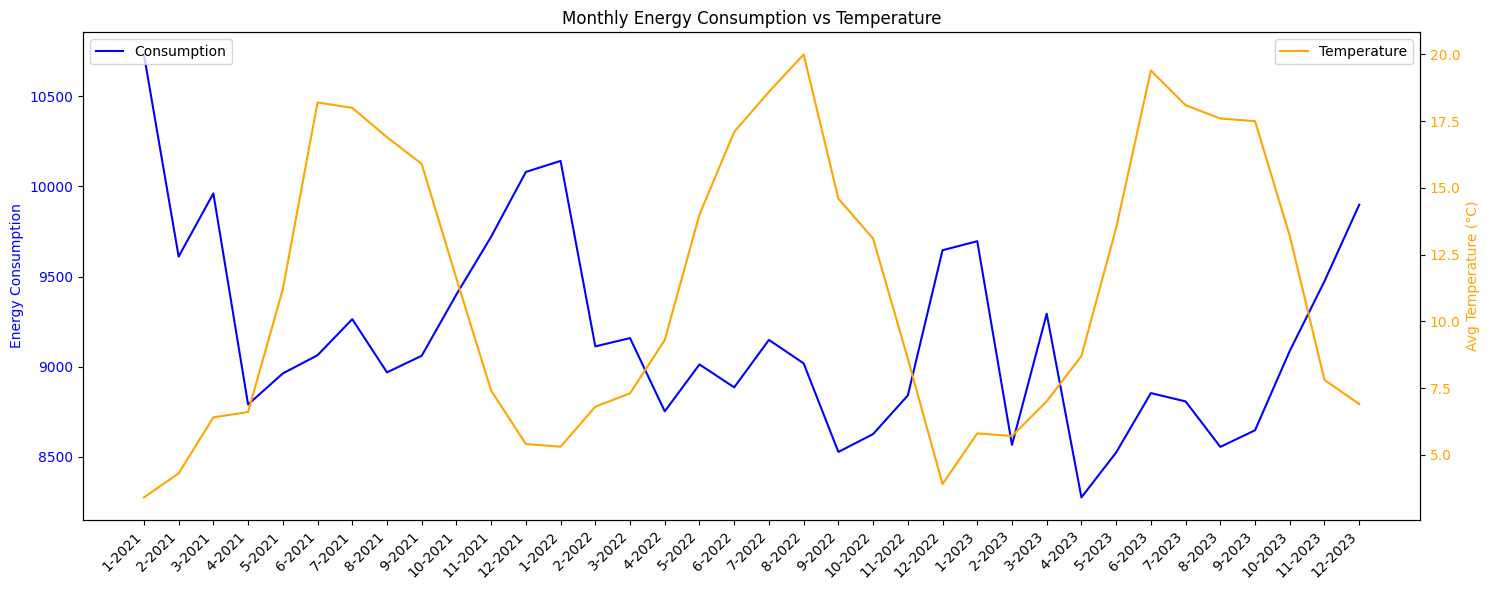

In [18]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_ylabel('Energy Consumption', color='blue')
ax1.plot(df_temperature_consumption['Month'].astype(str) + '-' + df_temperature_consumption['Year'].astype(str), 
         df_temperature_consumption['Consumption'], color='blue', label='Consumption')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Temperature (°C)', color='orange')
ax2.plot(df_temperature_consumption['Month'].astype(str) + '-' + df_temperature_consumption['Year'].astype(str), 
         df_temperature_consumption['Avg Temperature'], color='orange', label='Temperature')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Monthly Energy Consumption vs Temperature')

ax1.set_xticks(range(len(df_temperature_consumption))) 
ax1.set_xticklabels(df_temperature_consumption['Month'].astype(str) + '-' + df_temperature_consumption['Year'].astype(str), rotation=45, ha='right')

fig.tight_layout()
plt.show()


In this graph we can see that generally the energy consumption is higher when the temperature is lower, however there is no significant difference in energy consumption. We can already see this in the previous bar chart that showed the average energy consumption per month. 

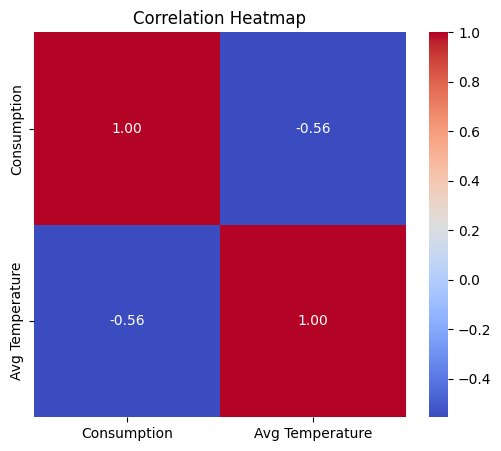

In [20]:
corr = df_temperature_consumption[['Consumption', 'Avg Temperature']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

This heatmap confirms there is not a strong correlation between the average temperature and the energy consumption. Maybe if we had more specific consumption data (per day instead of per month) the correlation would be higher, but for now we can conclude the temperature does not have a significant effect on the energy consumption.

## Production Data
TODO correlate energy consumption data to energy production data.